In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import phrases
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import warnings
warnings.filterwarnings("ignore")

In [2]:
headlines = pd.read_csv('headlines_df.csv')
headlines.head()

,brand,country,medium,headline,industry
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism
1,Infiniti,United States,Print,accelerating the future,Automotive & Services
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health


In [3]:
text = headlines.headline

In [128]:
stuff = list(p)

In [152]:
def remove_stopwords(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]
def lemmatize_stemming(text):
    short = []
    for word in text:
        short.append(SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(word)))
    return short
def trigrams(text):
    bigram = gensim.models.Phrases(text)
    bigramizer = phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[text], threshold=5)
    trigramizer = phrases.Phraser(trigram)
    return [trigramizer[bigramizer[doc]] for doc in text]

def preprocess(text):
    stopped_tokenize = text.map(remove_stopwords)
    short = list(stopped_tokenize.map(lemmatize_stemming))
    return trigrams(short)

In [153]:
processed = pd.Series(preprocess(text))

In [104]:
def lemmatize_stemming(text):
    return SnowballStemmer('english').stem(WordNetLemmatizer().lemmatize(text))
def preprocessor(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [105]:
# sample = text[0]
# print('original document: ')
# words = []
# for word in sample.split(' '):
#     words.append(word)
# print(words)
# print('\n\n tokenized and lemmatized document: ')
# print(preprocessor(sample))

original document: 
['roger', 'waters', 'live', 'in', 'paris', '3', 'nights', '', 'concert', '€699', 'monday', '30', 'may', '2011']


 tokenized and lemmatized document: 
['roger', 'water', 'live', 'pari', 'night', 'concert', 'monday']


In [7]:
# processed = text.map(preprocess)
# processed[:10]

0    [roger, water, live, pari, night, concert, mon...
1                                     [acceler, futur]
2             [offici, ride, spinfest, amateur, award]
3    [travel, fruit, caus, pollut, think, global, l...
4                                             [beauti]
5                   [make, monday, tast, like, friday]
6                                    [seatbelt, excus]
7                                               [tast]
8       [offici, licens, gala, poster, game, lotusiad]
9                                       [soft, strong]
Name: headline, dtype: object

In [265]:
dictionary = gensim.corpora.Dictionary(processed)
# dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=50000)

In [266]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]
bow_corpus[1510]

[(38, 1),
 (206, 1),
 (218, 2),
 (722, 1),
 (1600, 1),
 (2686, 1),
 (2928, 1),
 (3758, 1),
 (3759, 1)]

In [267]:
bow_doc_1510 = bow_corpus[1510]
for i in range(len(bow_doc_1510)):
    print('Word {} (\'{}\') appears {} time.'.format(bow_doc_1510[i][0],dictionary[bow_doc_1510[i][0]],bow_doc_1510[i][1]))

Word 38 ('new') appears 1 time.
Word 206 ('visual') appears 1 time.
Word 218 ('life') appears 2 time.
Word 722 ('action') appears 1 time.
Word 1600 ('claim') appears 1 time.
Word 2686 ('aid') appears 1 time.
Word 2928 ('chines_charact') appears 1 time.
Word 3758 ('composit') appears 1 time.
Word 3759 ('preserv') appears 1 time.


In [157]:
dictionary[bow_doc_1510[0][0]]

'new'

In [268]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf[0]

[(0, 0.4285778298091753),
 (1, 0.25688012701008806),
 (2, 0.42325385960952927),
 (3, 0.3031063567487405),
 (4, 0.39048707404230343),
 (5, 0.4986451069134985),
 (6, 0.27962341340557845)]

In [277]:
lda = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=3)

In [278]:
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"new" + 0.008*"time" + 0.007*"world" + 0.005*"protect" + 0.005*"help" + 0.005*"dont" + 0.004*"fun" + 0.004*"good" + 0.004*"like" + 0.004*"road"
Topic: 1 
Words: 0.007*"need" + 0.006*"power" + 0.006*"place" + 0.005*"help" + 0.005*"water" + 0.005*"day" + 0.005*"stop" + 0.005*"dont" + 0.005*"world" + 0.004*"kill"
Topic: 2 
Words: 0.011*"world" + 0.008*"want" + 0.005*"tast" + 0.005*"car" + 0.005*"life" + 0.004*"free" + 0.004*"drive" + 0.004*"new" + 0.004*"music" + 0.004*"peopl"
Topic: 3 
Words: 0.006*"year" + 0.006*"play" + 0.006*"love" + 0.006*"new" + 0.005*"sport" + 0.005*"your" + 0.005*"dont" + 0.005*"look" + 0.005*"stori" + 0.005*"drink"
Topic: 4 
Words: 0.007*"help" + 0.007*"new" + 0.006*"need" + 0.005*"peopl" + 0.005*"real" + 0.005*"work" + 0.004*"man" + 0.004*"use" + 0.004*"book" + 0.004*"clean"
Topic: 5 
Words: 0.008*"life" + 0.007*"child" + 0.005*"protect" + 0.005*"kid" + 0.005*"better" + 0.005*"need" + 0.004*"stay" + 0.004*"movi" + 0.004*"want" + 0.004*"wor

In [279]:
lda_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=3)
for idx, topic in lda_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.005*"need" + 0.005*"protect" + 0.003*"care" + 0.003*"peopl" + 0.003*"tast" + 0.003*"new" + 0.002*"enjoy" + 0.002*"dont" + 0.002*"cloth" + 0.002*"time"
Topic: 1 
Words: 0.005*"day" + 0.005*"help" + 0.004*"fit" + 0.004*"place" + 0.003*"play" + 0.003*"dog" + 0.003*"hair" + 0.003*"world" + 0.003*"life" + 0.003*"old"
Topic: 2 
Words: 0.003*"fast" + 0.002*"home" + 0.002*"woman" + 0.002*"readi" + 0.002*"free" + 0.002*"new" + 0.002*"speak" + 0.002*"world" + 0.002*"feel" + 0.002*"man"
Topic: 3 
Words: 0.004*"world" + 0.004*"dont" + 0.004*"life" + 0.003*"live" + 0.003*"new" + 0.003*"read" + 0.003*"better" + 0.002*"help" + 0.002*"energi" + 0.002*"faster"
Topic: 4 
Words: 0.004*"love" + 0.004*"know" + 0.004*"stori" + 0.003*"want" + 0.003*"child" + 0.003*"work" + 0.003*"sport" + 0.003*"imagin" + 0.003*"there" + 0.003*"new"
Topic: 5 
Words: 0.006*"dont" + 0.006*"drive" + 0.004*"your" + 0.004*"eat" + 0.004*"time" + 0.003*"power" + 0.003*"like" + 0.003*"thing" + 0.003*"travel" + 0.0

In [280]:
lda_tfidf.log_perplexity(bow_corpus)

-9.262577721778447

In [281]:
from gensim.models import CoherenceModel

In [283]:
CoherenceModel(model=lda_tfidf, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()

0.32807687954044695

In [286]:
from tqdm import tqdm_notebook as tq
for num in tq(range(5,21)):
    lda = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num, id2word=dictionary, passes=15, chunksize=5000)
    cscore = CoherenceModel(model=lda, texts=processed, dictionary=dictionary, coherence='c_v').get_coherence()
    pscore = lda.log_perplexity(bow_corpus)
    print(cscore,pscore)

0.28176492426484295 -9.076283055271173
0.2961177125241314 -9.134378048389967
0.2980721273319847 -9.194096027665775
0.29252672140014413 -9.246839845568687
0.28838812203968806 -9.284923474263696
0.3732918858982301 -9.308266550172387
0.362100477367312 -9.355563697333185
0.37170347567265055 -9.378011468902354
0.3687728971732476 -9.404573054246635
0.3972597466573853 -9.433985203754306
0.42858435234646197 -9.462806320289875
0.41463823772775354 -9.499163277715619
0.4118440353305193 -9.502496009099273
0.4403137645993722 -9.52550212070041
0.44598916945155576 -9.563547879905675
0.4628094979230565 -9.559672552067717


In [213]:
processed[21850]

['forget', 'phone', 'sync', 'famili']

In [214]:
bow_corpus[21850]

[(745, 1), (767, 1), (2535, 1), (6746, 1)]

In [275]:
for index, score in sorted(lda[bow_corpus[21855]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda.print_topic(index, 10)))


Score: 0.5508939027786255	 
Topic: 0.007*"life" + 0.006*"stop" + 0.006*"need" + 0.005*"help" + 0.005*"let" + 0.005*"time" + 0.005*"love" + 0.004*"power" + 0.004*"music" + 0.004*"your"

Score: 0.32750117778778076	 
Topic: 0.007*"new" + 0.005*"help" + 0.004*"day" + 0.004*"natur" + 0.004*"dont" + 0.004*"look" + 0.004*"life" + 0.004*"eye" + 0.004*"best" + 0.004*"world"

Score: 0.040705855935811996	 
Topic: 0.007*"good" + 0.007*"new" + 0.006*"time" + 0.006*"dont" + 0.006*"know" + 0.006*"real" + 0.005*"thing" + 0.005*"life" + 0.004*"want" + 0.004*"like"

Score: 0.04050524905323982	 
Topic: 0.010*"new" + 0.009*"world" + 0.006*"car" + 0.006*"child" + 0.006*"live" + 0.005*"come" + 0.005*"year" + 0.005*"home" + 0.004*"place" + 0.004*"time"

Score: 0.040393851697444916	 
Topic: 0.009*"dont" + 0.007*"woman" + 0.007*"peopl" + 0.007*"like" + 0.006*"way" + 0.005*"life" + 0.005*"help" + 0.005*"work" + 0.005*"need" + 0.005*"day"


In [276]:
for index, score in sorted(lda_tfidf[bow_corpus[21855]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_tfidf.print_topic(index, 10)))


Score: 0.8355053663253784	 
Topic: 0.003*"work" + 0.003*"need" + 0.003*"game" + 0.003*"let" + 0.002*"dont" + 0.002*"time" + 0.002*"like" + 0.002*"sound" + 0.002*"great" + 0.002*"watch"

Score: 0.04224855825304985	 
Topic: 0.004*"new" + 0.003*"dream" + 0.003*"want" + 0.003*"smoke" + 0.003*"day" + 0.002*"protect" + 0.002*"life" + 0.002*"food" + 0.002*"tast" + 0.002*"money"

Score: 0.040908657014369965	 
Topic: 0.004*"world" + 0.004*"dont" + 0.004*"know" + 0.003*"drive" + 0.003*"time" + 0.003*"love" + 0.003*"happen" + 0.003*"music" + 0.003*"come" + 0.003*"play"

Score: 0.04067205637693405	 
Topic: 0.004*"help" + 0.003*"life" + 0.003*"good" + 0.003*"natur" + 0.003*"live" + 0.003*"dont" + 0.003*"look" + 0.003*"book" + 0.003*"your" + 0.003*"year"

Score: 0.040665339678525925	 
Topic: 0.004*"life" + 0.003*"new" + 0.003*"world" + 0.002*"stop" + 0.002*"kill" + 0.002*"car" + 0.002*"better" + 0.002*"day" + 0.002*"fresh" + 0.002*"best"


In [250]:
sorted(lda_tfidf[bow_corpus[21850]], key=lambda tup: -1*tup[1])[0][1]

0.5813545

In [251]:
topics = []
scores = []
for i in range(len(bow_corpus)):
    topics.append(sorted(lda_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1])[0][0])
    scores.append(sorted(lda_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1])[0][1])

In [252]:
count = 0
for i in scores:
    if i < .07:
        count += 1
print(count)

338


In [253]:
headlines['topic'] = topics
headlines['scores'] = scores

In [254]:
headlines.head()

,brand,country,medium,headline,industry,topic,scores
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism,8,0.583609
1,Infiniti,United States,Print,accelerating the future,Automotive & Services,14,0.688888
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services,7,0.553637
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit,11,0.403272
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health,3,0.688889


In [256]:
headlines[headlines.industry == 'Public interest & Non-profit'].topic.unique()

array([11, 10,  6,  1,  0, 13,  4,  5,  8, 14,  7,  9, 12,  2,  3],
      dtype=int64)

In [67]:
for index, score in sorted(lda[bow_corpus[20434]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda.print_topic(index, 10)))


Score: 0.06666667014360428	 
Topic: 0.015*"world" + 0.010*"clean" + 0.010*"wait" + 0.010*"anim" + 0.009*"price" + 0.009*"believ" + 0.008*"king" + 0.007*"burger" + 0.006*"vote" + 0.006*"beauti"

Score: 0.06666667014360428	 
Topic: 0.021*"music" + 0.015*"work" + 0.014*"smoke" + 0.012*"there" + 0.012*"like" + 0.010*"world" + 0.009*"hard" + 0.008*"talk" + 0.008*"sound" + 0.008*"great"

Score: 0.06666667014360428	 
Topic: 0.022*"chang" + 0.019*"life" + 0.015*"live" + 0.011*"come" + 0.010*"woman" + 0.010*"stori" + 0.009*"time" + 0.009*"imagin" + 0.009*"world" + 0.009*"idea"

Score: 0.06666667014360428	 
Topic: 0.014*"think" + 0.011*"littl" + 0.009*"know" + 0.008*"dont" + 0.008*"fish" + 0.007*"reason" + 0.007*"enjoy" + 0.006*"like" + 0.006*"your" + 0.006*"true"

Score: 0.06666667014360428	 
Topic: 0.013*"color" + 0.011*"world" + 0.010*"movi" + 0.010*"game" + 0.009*"happen" + 0.009*"design" + 0.008*"best" + 0.007*"right" + 0.007*"team" + 0.007*"perfect"

Score: 0.06666667014360428	 
Topic: 0.

In [65]:
lda_tfidf.print_topics(0)

[(11,
  '0.015*"save" + 0.011*"world" + 0.010*"stori" + 0.008*"colour" + 0.008*"faster" + 0.007*"life" + 0.006*"insur" + 0.006*"what" + 0.006*"wait" + 0.006*"mouth"'),
 (4,
  '0.015*"want" + 0.014*"imagin" + 0.012*"happen" + 0.010*"fight" + 0.009*"sleep" + 0.009*"smoke" + 0.007*"classic" + 0.007*"high" + 0.006*"dont" + 0.006*"kid"'),
 (8,
  '0.015*"dream" + 0.009*"fast" + 0.008*"friend" + 0.007*"live" + 0.007*"get" + 0.007*"blood" + 0.007*"littl" + 0.007*"great" + 0.006*"effect" + 0.006*"christma"'),
 (12,
  '0.010*"life" + 0.009*"look" + 0.009*"turn" + 0.009*"real" + 0.007*"park" + 0.007*"assist" + 0.007*"size" + 0.006*"smell" + 0.006*"night" + 0.006*"foot"'),
 (14,
  '0.010*"beer" + 0.009*"fresh" + 0.009*"home" + 0.009*"help" + 0.008*"game" + 0.007*"there" + 0.007*"choic" + 0.006*"winter" + 0.006*"start" + 0.006*"histori"'),
 (0,
  '0.018*"music" + 0.017*"dont" + 0.010*"sound" + 0.009*"place" + 0.009*"happi" + 0.009*"stain" + 0.008*"hear" + 0.008*"remov" + 0.007*"break" + 0.007*"forg

In [68]:
headlines.topic.value_counts()

0     2002
5     1760
14    1746
9     1659
6     1658
11    1655
12    1651
3     1636
7     1628
2     1523
8     1512
4     1474
13    1471
10    1432
1     1425
Name: topic, dtype: int64

In [292]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
import en_core_web_sm

In [296]:
stopped = text.map(remove_stopwords)
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lemmatize(text, postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    text_out = []
    for item in tq(text):
        doc = nlp(' '.join(item))
        text_out.append(' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in postags]))
    return text_out
lemmas = lemmatize(list(stopped))

In [297]:
lemmas[:5]

['roger water live paris night concert monday',
 'accelerate future',
 'official ride spinf amateur dj award',
 'travel fruit because pollution think global eat local',
 'art beauty']

In [298]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=5, max_df=.33, token_pattern='[a-zA-Z0-9]{2,}', max_features=20000)
data_vect = vectorizer.fit_transform(lemmas)

In [300]:
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
lda_output = lda.fit_transform(data_vect)

In [303]:
lda_output[0].argmax()

4

In [304]:
topics = []
scores = []
for n in tq(range(lda_output.shape[0])):
    topics.append(lda_output[n].argmax())
    scores.append(max(lda_output[n]))

In [305]:
headlines.head()

,brand,country,medium,headline,industry,topic,scores
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism,8,0.583609
1,Infiniti,United States,Print,accelerating the future,Automotive & Services,14,0.688888
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services,7,0.553637
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit,11,0.403272
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health,3,0.688889


In [306]:
headlines.topic = topics
headlines.scores = scores
headlines.head()

,brand,country,medium,headline,industry,topic,scores
0,Tzabar,Israel,Print,roger waters live in paris 3 nights concert €...,Transport & Tourism,4,0.443604
1,Infiniti,United States,Print,accelerating the future,Automotive & Services,8,0.622662
2,Toyota,Canada,Print,official ride of the spinfest amateur dj awards,Automotive & Services,6,0.670486
3,Friends of the Earth,Germany,Print,travelling fruits cause pollution think global...,Public interest & Non-profit,7,0.400406
4,Max Factor,Colombia,Print,the art of beauty,Beauty & Health,9,0.626828


In [308]:
headlines.topic.value_counts()

6    3464
0    2694
5    2589
8    2405
9    2379
1    2234
4    2217
3    2180
2    2141
7    1929
Name: topic, dtype: int64

In [309]:
headlines[headlines.industry == 'Transport & Tourism'].topic.value_counts()

5    128
6    125
9     87
7     76
2     75
0     67
8     66
4     64
3     52
1     26
Name: topic, dtype: int64

In [310]:
headlines[headlines.industry == 'Public interest & Non-profit'].topic.value_counts()

6    812
8    471
1    446
4    383
5    372
9    332
0    329
3    324
2    212
7    200
Name: topic, dtype: int64

In [311]:
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
show_topics(vectorizer, lda)

[array(['power', 'game', 'original', 'not', 'do', 'sound', 'summer',
        'taste', 'easy', 'season'], dtype='<U15'),
 array(['book', 'not', 'clean', 'colour', 'strong', 'do', 'difference',
        'blood', 'paper', 'art'], dtype='<U15'),
 array(['new', 'water', 'color', 'fun', 'energy', 'start', 'stain',
        'close', 'stop', 'happen'], dtype='<U15'),
 array(['dog', 'world', 'movie', 'change', 'good', 'watch', 'mini',
        'history', 'new', 'truth'], dtype='<U15'),
 array(['fast', 'not', 'time', 'do', 'care', 'die', 'clothe', 'year',
        'sleep', 'lose'], dtype='<U15'),
 array(['good', 'big', 'work', 'live', 'great', 'look', 'idea', 'small',
        'time', 'little'], dtype='<U15'),
 array(['not', 'do', 'drive', 'help', 'music', 'let', 'dream', 'want',
        'child', 'need'], dtype='<U15'),
 array(['protect', 'enjoy', 'life', 'fit', 'insurance', 'perfect', 'come',
        'fresh', 'feel', 'solution'], dtype='<U15'),
 array(['love', 'eat', 'think', 'know', 'road', 'be', '

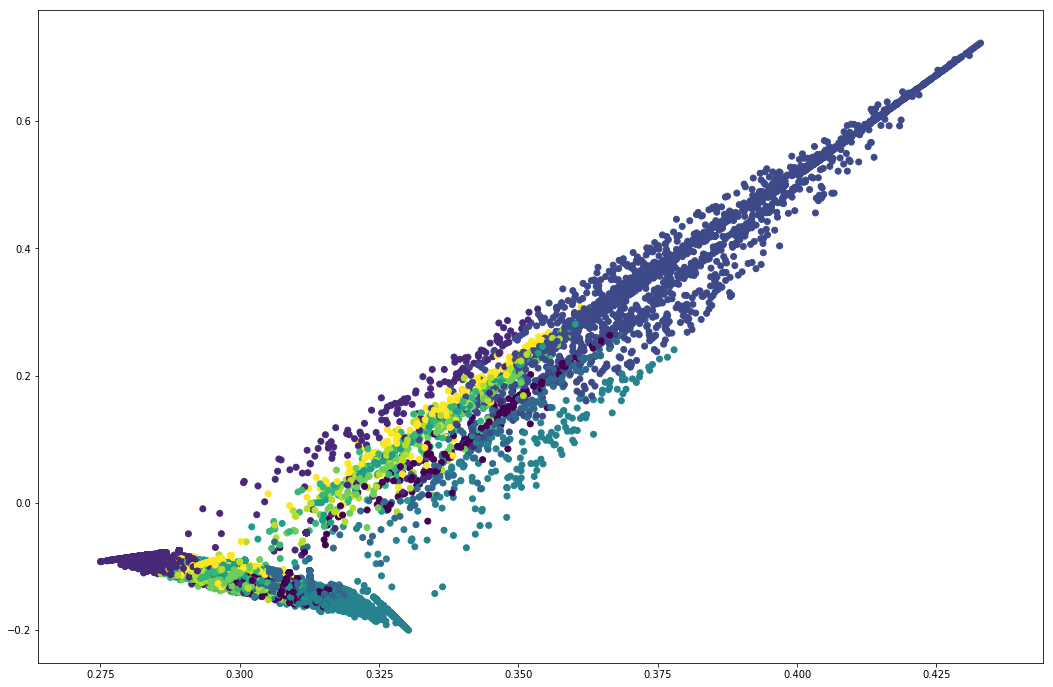

In [312]:
clusters = KMeans(n_clusters=10).fit_predict(lda_output)
svd = TruncatedSVD(n_components=2)
lda_output_svd = svd.fit_transform(lda_output)
x = lda_output_svd[:,0]
y = lda_output_svd[:,1]
plt.figure(figsize=(18,12))
plt.scatter(x,y,c=clusters)

In [319]:
len(clusters)

24232

In [321]:
svd3 = TruncatedSVD(n_components=3)
lda_output_svd3 = svd3.fit_transform(lda_output)
x3 = lda_output_svd3[:,0]
y3 = lda_output_svd3[:,1]
z3 = lda_output_svd3[:,2]
d = {'x':x3, 'y':y3, 'z':z3, 'topic':clusters}
pca3df = pd.DataFrame(d)
pca3df.head()

,x,y,z,topic
0,0.299963,-0.123730,-0.104208,6
1,0.312630,-0.116309,-0.168255,3
2,0.404902,0.544406,0.025977,2
3,0.292740,-0.108416,-0.105898,1
4,0.308354,-0.121087,-0.116357,0


In [331]:
from collections import Counter
from nltk.collocations import *
from operator import itemgetter
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [332]:
stop_words = stopwords.words('english')
stop_words += ['1','2','3','4','5','6','7','8','9','0']

In [348]:
def df_word_analyzer(filter_column_variable_name, stop_words, new_stop_words):
    words = headlines.loc[headlines.topic == filter_column_variable_name, 'headline'].ravel()
    tokens = []
    for word in words:
        token = word_tokenize(word)
        tokens+=token
    stop_words += new_stop_words
    stopped = [word for word in tokens if word not in stop_words]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmas = []
    for word in stopped:
        if word != 'us':
            lemma = lemmatizer.lemmatize(word)
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    common_words = Counter(lemmas).most_common(100)
    bigrams = nltk.collocations.BigramAssocMeasures()
    bi_finder = BigramCollocationFinder.from_words(lemmas)
    bi_scored = bi_finder.score_ngrams(bigrams.raw_freq)
    trigrams = nltk.collocations.TrigramAssocMeasures()
    tri_finder = TrigramCollocationFinder.from_words(lemmas)
    tri_scored = tri_finder.score_ngrams(trigrams.raw_freq)
    bi_scored_sort = sorted(bi_scored, key=itemgetter(1), reverse=True)
    tri_scored_sort = sorted(tri_scored, key=itemgetter(1), reverse=True)
    word_freq_dict = {}
    bi_freq_dict = {}
    tri_freq_dict = {}
    for i in range(len(common_words)):
        word_freq_dict[common_words[i][0]] = common_words[i][1]
    for i in range(len(bi_scored_sort)):
        bi_freq_dict[' '.join(bi_scored_sort[i][0])] = bi_scored_sort[i][1]
    for i in range(len(tri_scored_sort)):
        text = ' '.join(tri_scored_sort[i][0])
        if 'longxi' in text:
            pass
        else:
            tri_freq_dict[text] = tri_scored_sort[i][1]
    return word_freq_dict, bi_freq_dict, tri_freq_dict

In [349]:
def word_cloud(word_freq, bigram_freq, trigram_freq):
    wc1 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(word_freq)
    wc2 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(bigram_freq)
    wc3 = WordCloud(max_words=100, height = 500, width = 1000, background_color='white').generate_from_frequencies(trigram_freq)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,24))
    ax1.axis('off'), ax2.axis('off'), ax3.axis('off')
    ax1.set_title('One Word', fontdict={'fontsize':30}), ax2.set_title('Bigrams', fontdict={'fontsize':30}), 
    ax3.set_title('Trigrams', fontdict={'fontsize':30})
    ax1.imshow(wc1, interpolation = 'bilinear')
    ax2.imshow(wc2, interpolation = 'bilinear')
    ax3.imshow(wc3, interpolation = 'bilinear')
    return None

In [350]:
eight_stop_words = []
eight_word_freq, eight_bigram_freq, eight_trigram_freq = df_word_analyzer(8, stop_words, eight_stop_words)

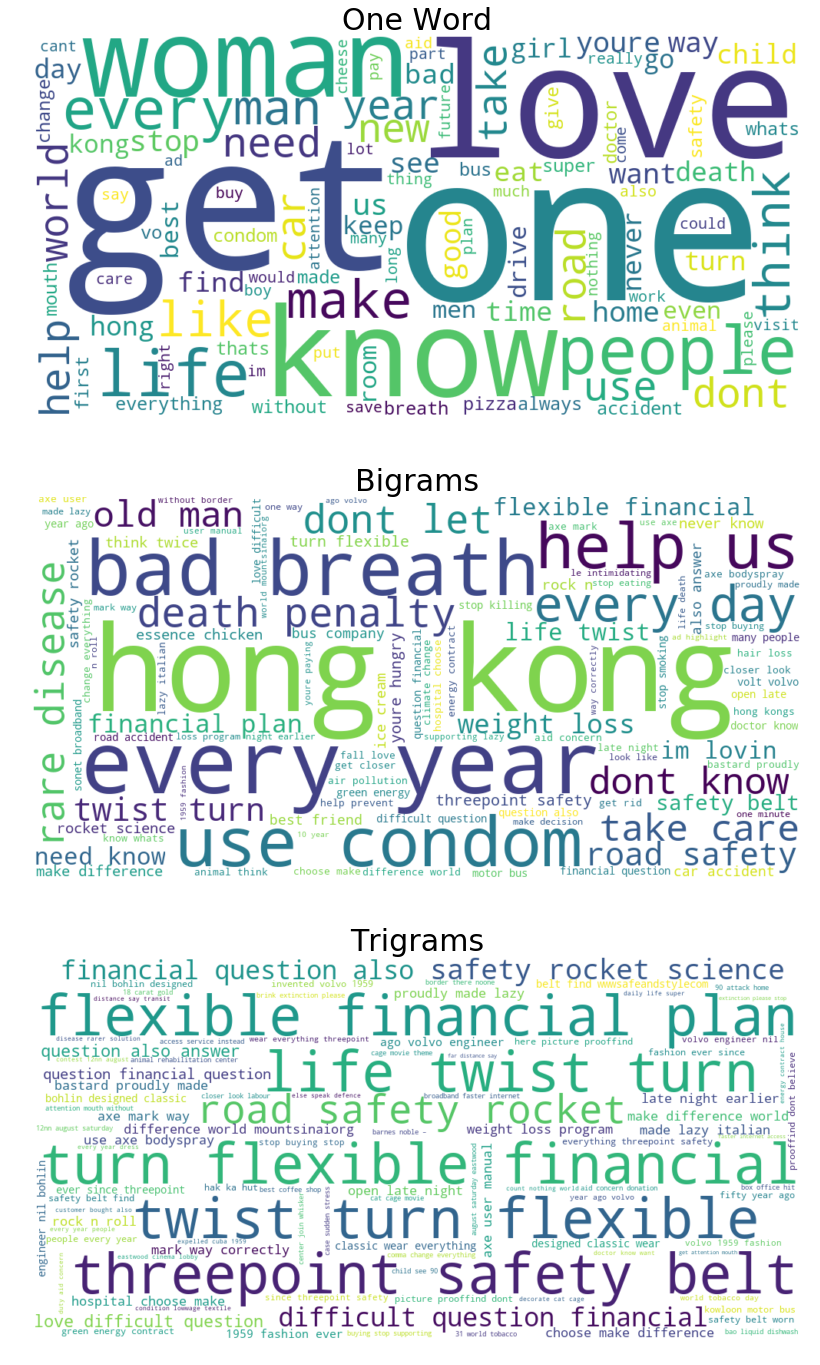

In [352]:
word_cloud(eight_word_freq, eight_bigram_freq, eight_trigram_freq)

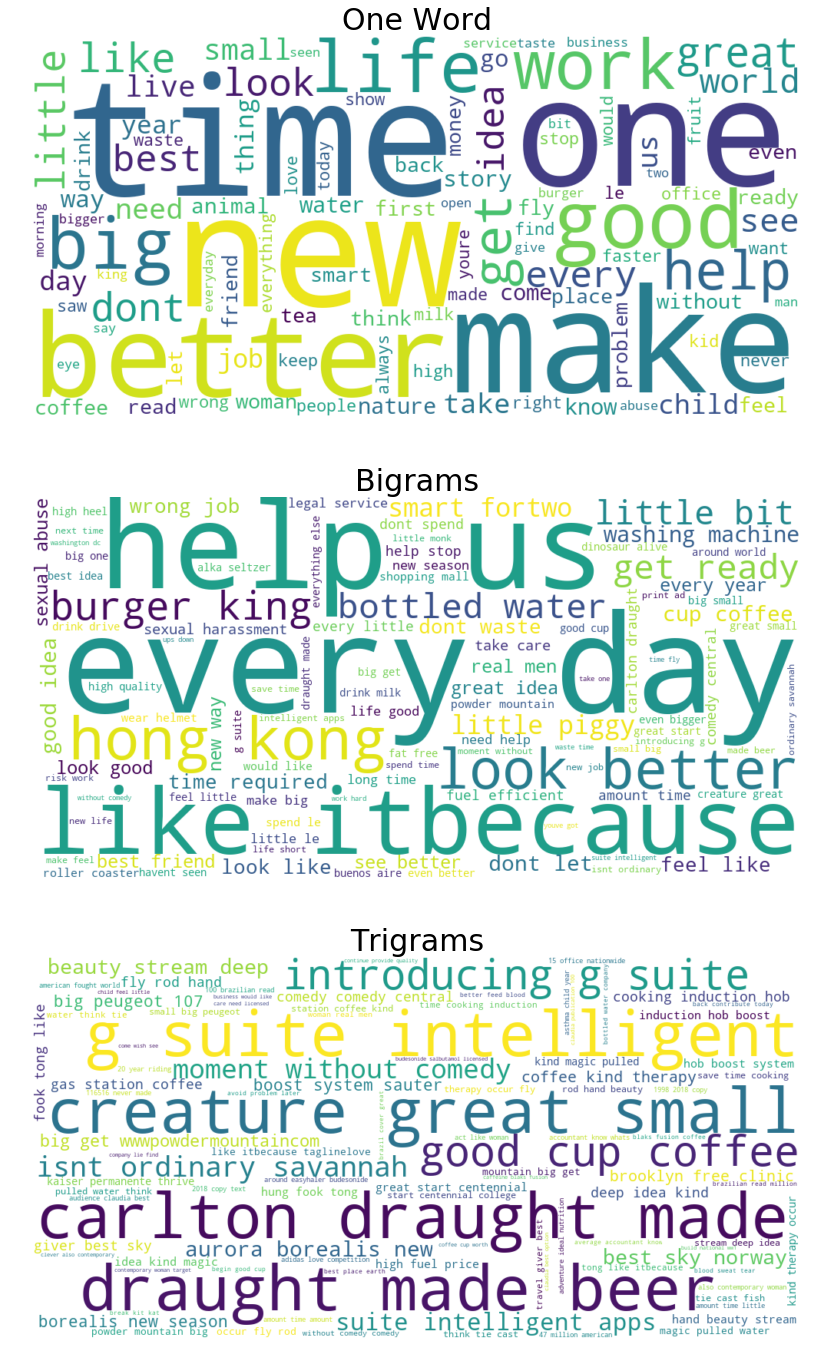

In [353]:
t5_stop_words = []
t5_word_freq, t5_bigram_freq, t5_trigram_freq = df_word_analyzer(5, stop_words, eight_stop_words)
word_cloud(t5_word_freq, t5_bigram_freq,t5_trigram_freq)

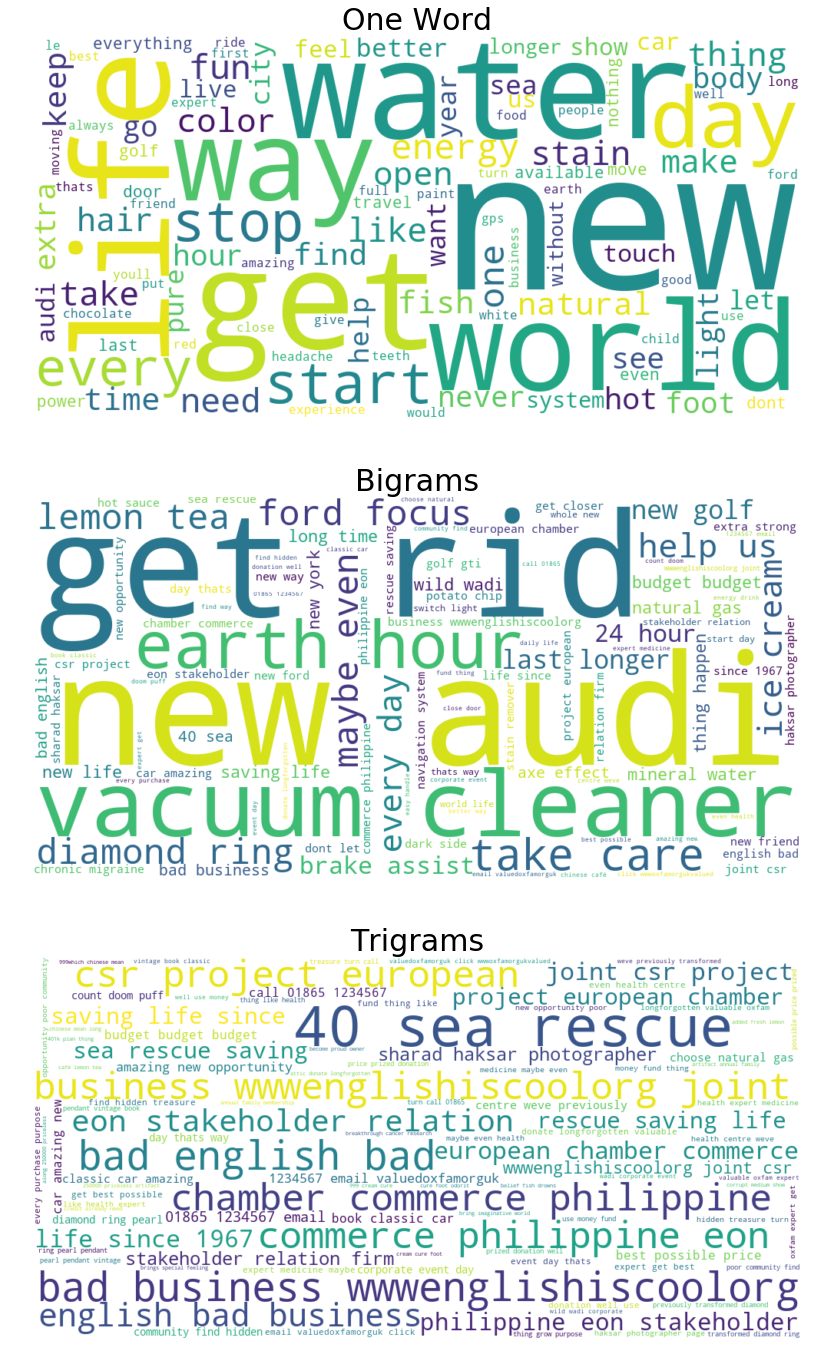

In [354]:
t2_stop_words = []
t2_word_freq, t2_bigram_freq, t2_trigram_freq = df_word_analyzer(2, stop_words, eight_stop_words)
word_cloud(t2_word_freq, t2_bigram_freq,t2_trigram_freq)

In [356]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [357]:
panel = pyLDAvis.sklearn.prepare(lda, data_vect, vectorizer, mds='tsne')

In [358]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
6      -57.451412 -189.480316       1        1  13.869567
5     -155.162903   36.669182       2        1  10.563907
8       88.883064 -151.474716       3        1  10.316469
9      142.664658  115.763191       4        1   9.850540
1      -29.838898  -52.270531       5        1   9.554431
4      120.132118  -18.732901       6        1   9.429044
3     -177.692505  -97.827690       7        1   9.375113
0       22.421488  207.414307       8        1   9.333928
2       -5.191201   70.205803       9        1   8.997063
7     -123.913391  169.411118      10        1   8.709938, topic_info=     Category        Freq         Term       Total  loglift  logprob
359   Default  114.000000          big  114.000000  30.0000  30.0000
744   Default   54.000000        color   54.000000  29.0000  29.0000
1157  Default   61.000000          dog   61.000000  28.0000  28.0000
1229  Default   65.000000          eat   65.000000  27.0000  27.0000
2714  Default   46.000000     original   46.000000  26.0000  26.0000
1639  Default   69.000000         game   69.000000  25.0000  25.0000
1153  Default  334.000000           do  334.000000  24.0000  24.0000
2946  Default   92.000000        power   92.000000  23.0000  23.0000
2634  Default  405.000000          not  405.000000  22.0000  22.0000
1307  Default   57.000000        enjoy   57.000000  21.0000  21.0000
3677  Default   39.000000        stain   39.000000  20.0000  20.0000
2541  Default   62.000000        movie   62.000000  19.0000  19.0000
1622  Default   61.000000          fun   61.000000  18.0000  18.0000
2322  Default  149.000000         love  149.000000  17.0000  17.0000
403   Default   70.000000         book   70.000000  16.0000  16.0000
1524  Default   46.000000          fit   46.000000  15.0000  15.0000
4233  Default   93.000000        water   93.000000  14.0000  14.0000
1462  Default   79.000000         fast   79.000000  13.0000  13.0000
2030  Default   40.000000    insurance   40.000000  12.0000  12.0000
1299  Default   51.000000       energy   51.000000  11.0000  11.0000
3338  Default   50.000000         safe   50.000000  10.0000  10.0000
1929  Default   57.000000         idea   57.000000   9.0000   9.0000
2563  Default   97.000000        music   97.000000   8.0000   8.0000
4304  Default  108.000000         work  108.000000   7.0000   7.0000
3036  Default   77.000000      protect   77.000000   6.0000   6.0000
746   Default   35.000000       colour   35.000000   5.0000   5.0000
1196  Default  124.000000        drive  124.000000   4.0000   4.0000
2485  Default   34.000000         mini   34.000000   3.0000   3.0000
3986  Default   34.000000        tough   34.000000   2.0000   2.0000
1189  Default   67.000000        dream   67.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
4137  Topic10   11.289666     vacation   13.326722   2.2748  -5.9520
2016  Topic10   11.985056  inspiration   14.225183   2.2694  -5.8923
4356  Topic10   18.796609          zoo   22.948141   2.2411  -5.4422
4039  Topic10   19.672587         trip   24.223882   2.2326  -5.3967
1307  Topic10   44.222157        enjoy   57.389183   2.1801  -4.5867
2333  Topic10   15.190847        lucky   18.430070   2.2474  -5.6552
322   Topic10   15.226199          bed   18.593510   2.2409  -5.6529
3781  Topic10   22.025423          sun   27.959414   2.2021  -5.2837
3304  Topic10   10.473376         roof   12.406021   2.2714  -6.0271
4049  Topic10   23.996692        trust   31.369402   2.1728  -5.1980
855   Topic10   22.010884         cool   28.709919   2.1750  -5.2844
3591  Topic10   25.289892     solution   33.673561   2.1544  -5.1455
1260  Topic10   12.888079     electric   15.675703   2.2449  -5.8196
3994  Topic10   20.424068          toy   27.256858   2.1521  -5.3592
2807  Topic10   30.030254      perfect   45.904016   2.0164  -4.9737
3036  Topic10   44